In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Question 1b

In [2]:
P = np.array([[0.2, 0.7, 0.1], [0.2, 0.5, 0.3], [0.2, 0.4, 0.4]])

In [3]:
def sim_chain(init, P, n_steps):
    sim = np.zeros(n_steps)
    cur_pos = init

    for i in range(0, n_steps):
        sim[i] = cur_pos
        # sample new position
        probs = P[cur_pos - 1]
        sample = np.random.multinomial(n = 1, pvals = probs)
        cur_pos = np.where(sample == 1)[0][0] + 1
    
    return sim

Text(0, 0.5, 'position')

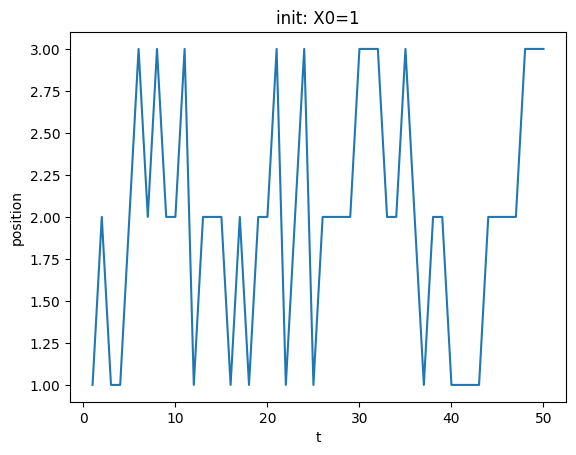

In [4]:
sim_walk = sim_chain(1, P, 50)
plt.plot(range(1, len(sim_walk) + 1), sim_walk)
plt.title("init: X0=1")
plt.xlabel("t")
plt.ylabel("position")

# Question 2b

In [5]:
def sim_chain(mu_0, n_steps, P):
    sim = np.zeros((n_steps, len(mu_0)))
    cur_mu = np.copy(mu_0)

    for i in range(0, n_steps):
        sim[i] = np.copy(cur_mu)
        cur_mu = np.copy(np.matmul(cur_mu, P))

    return sim

In [6]:
mu_0_1 = np.array([0.1, 0.6, 0.3])
mu_0_2 = np.array([0.4, 0.1, 0.5])
sim_1 = sim_chain(mu_0_1, 10, P)
sim_2 = sim_chain(mu_0_2, 10, P)

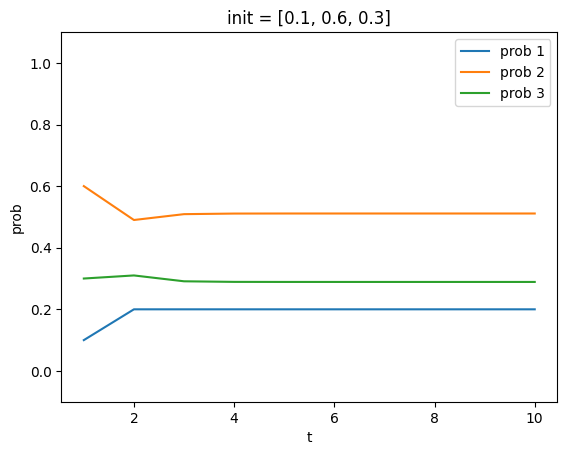

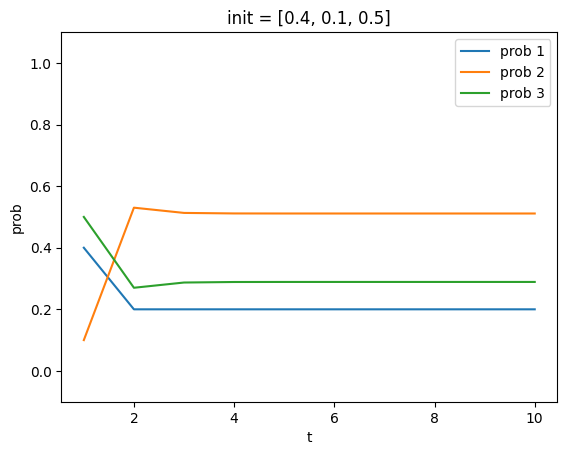

In [7]:
p_1 = sim_1[:, 0]
p_2 = sim_1[:, 1]
p_3 = sim_1[:, 2]

plt.figure()
plt.plot(range(1, len(sim_1)+1), p_1, label = "prob 1")
plt.plot(range(1, len(sim_1)+1), p_2, label = "prob 2")
plt.plot(range(1, len(sim_1)+1), p_3, label = "prob 3")
plt.ylim(-0.1, 1.1)
plt.title("init = [0.1, 0.6, 0.3]")
plt.xlabel("t")
plt.ylabel("prob")
plt.legend()

p_1 = sim_2[:, 0]
p_2 = sim_2[:, 1]
p_3 = sim_2[:, 2]

plt.figure()
plt.plot(range(1, len(sim_2)+1), p_1, label = "prob 1")
plt.plot(range(1, len(sim_2)+1), p_2, label = "prob 2")
plt.plot(range(1, len(sim_2)+1), p_3, label = "prob 3")
plt.ylim(-0.1, 1.1)
plt.title("init = [0.4, 0.1, 0.5]")
plt.xlabel("t")
plt.ylabel("prob")
plt.legend()

Text(0, 0.5, 'squared Euclidean distance from stationary')

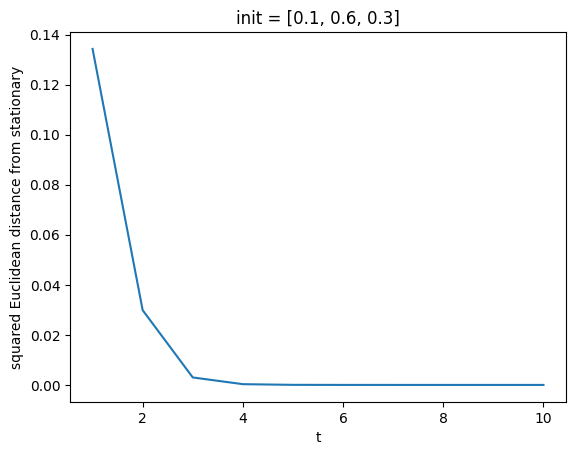

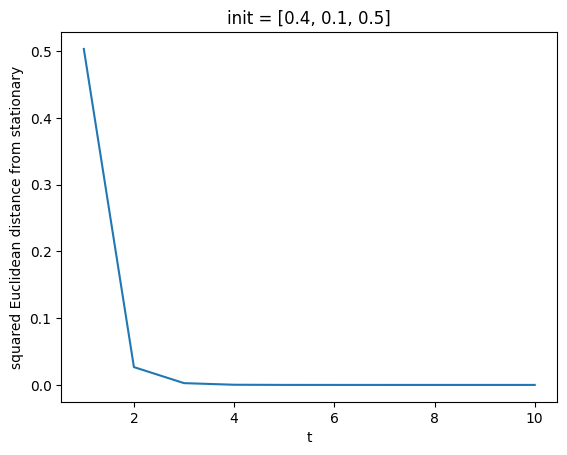

In [8]:
mu_inf = np.array([9/45, 23/45, 13/45])

norms = np.zeros(len(sim_1))
for i in range(0, len(norms)):
    norms[i] = np.linalg.norm(sim_1[i,:] - mu_inf, ord = 2)
plt.figure()
plt.plot(range(1, len(sim_1)+1), norms)
plt.title("init = [0.1, 0.6, 0.3]")
plt.xlabel("t")
plt.ylabel("squared Euclidean distance from stationary")

norms = np.zeros(len(sim_2))
for i in range(0, len(norms)):
    norms[i] = np.linalg.norm(sim_2[i,:] - mu_inf, ord = 2)
plt.figure()
plt.plot(range(1, len(sim_2)+1), norms)
plt.title("init = [0.4, 0.1, 0.5]")
plt.xlabel("t")
plt.ylabel("squared Euclidean distance from stationary")

# Question 3a

In [9]:
def time_until_3(init, P):
    # start at initial position
    cur_pos = init
    time = 0

    # keep stepping until reach 3rd state
    while(cur_pos != 3):
        time += 1
        # sample new position
        probs = P[cur_pos - 1]
        sample = np.random.multinomial(n = 1, pvals = probs)
        cur_pos = np.where(sample == 1)[0][0] + 1

    return time

Mean T1: 4.60272
Mean T2: 3.84274


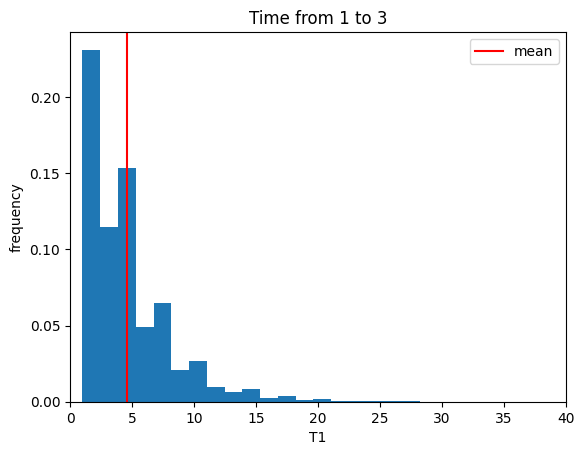

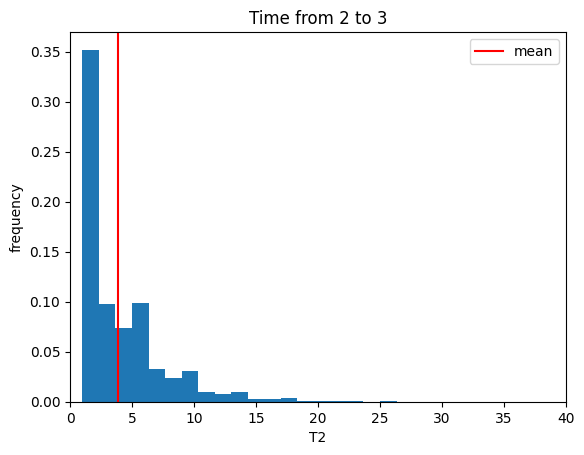

In [10]:
n_sims = 100000
T1s = np.zeros(n_sims)
for i in range(0, n_sims):
    T1s[i] = time_until_3(1, P)

print("Mean T1:", T1s.mean())
plt.figure()
plt.hist(T1s, bins = 30, density = True)
plt.axvline(T1s.mean(), color = "red", label = "mean")
plt.xlabel("T1")
plt.ylabel("frequency")
plt.title("Time from 1 to 3")
plt.xlim(0, 40)
plt.legend()

T2s = np.zeros(n_sims)
for i in range(0, n_sims):
    T2s[i] = time_until_3(2, P)

print("Mean T2:", T2s.mean())
plt.figure()
plt.hist(T2s, bins = 30, density = True)
plt.axvline(T2s.mean(), color = "red", label = "mean")
plt.xlabel("T2")
plt.ylabel("frequency")
plt.title("Time from 2 to 3")
plt.xlim(0, 40)
plt.legend()